In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_excel('C:/Users/SATYAM/Downloads/Data analyst Data (1).xlsx')
df.head(5)

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


In [3]:
df.isnull().sum()

First Name                                                            0
Email ID                                                              0
Quantity                                                              0
Events                                                                0
Attendee Status                                                       0
College Name                                                         15
How did you come to know about this event?                         2216
Specify in "Others" (how did you come to know about this event)    4805
Designation                                                           0
Year of Graduation                                                    0
City                                                                  0
CGPA                                                                  0
Experience with python (Months)                                       0
Family Income                                                   

In [4]:
df.dropna(subset=['First Name', 'Email ID'], inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4894 non-null   object 
 1   Email ID                                                         4894 non-null   object 
 2   Quantity                                                         4894 non-null   int64  
 3   Events                                                           4894 non-null   object 
 4   Attendee Status                                                  4894 non-null   object 
 5   College Name                                                     4879 non-null   object 
 6   How did you come to know about this event?                       2678 non-null   object 
 7   Specify in "Others" (how did you come to k

In [6]:
df.shape

(4894, 16)

# Basic Questions

## 1.  How many unique students are included in the dataset?

In [7]:
unique_students = df.drop_duplicates(subset=['First Name', 'Email ID'])
print(f"There are : {unique_students.shape} unique students")

There are : (2324, 16) unique students


#### In conclusion, by considering both student names and email addresses, we identified a total of 2324 unique students in the dataset. This approach allowed us to eliminate duplicate entries and obtain a clearer representation of individual students.

## 2. What is the average GPA of the student?

In [8]:
average_gpa = df['CGPA'].mean()
print("Average GPA:", average_gpa)

Average GPA: 8.038475684511647


#### In conclusion, the average GPA of the student population, calculated from the dataset, is [average GPA value]. This metric provides insight into the overall academic performance and achievement level of the students represented in the dataset.

## 3. What is the distribution of students across different graduation years?

In [9]:
graduation_year_distribution = df['Year of Graduation'].value_counts().sort_index()
graduation_year_distribution

Year of Graduation
2023    1536
2024    1511
2025    1292
2026     555
Name: count, dtype: int64

#### Conclusion:
It calculates the distribution of students across different years of graduation from the dataset. It uses the column "Year of Graduation" to gather the data and then applies the value_counts() function to count the occurrences of each unique graduation year. The resulting distribution is sorted in ascending order using sort_index() and the graduation_year_distribution now holds the counts of students who graduated in each unique year, allowing for a clear overview of how students are distributed across various graduation years. This information is helpful for understanding trends and patterns in student graduations over time.

## 4. What is the distribution of student's experience with python programming?

In [10]:
python_experience_distribution = df['Experience with python (Months)'].value_counts().sort_index()
python_experience_distribution

Experience with python (Months)
3    1008
4     466
5    1242
6     738
7     640
8     800
Name: count, dtype: int64

#### Conclusion:
The python_experience_distribution now contains the counts of students falling within different experience levels with Python programming, measured in months. This distribution gives you an overview of the variety of Python programming skills among the students in terms of their experience duration. It's a valuable insight for understanding the range and distribution of Python proficiency within the student population.

# 5. What is the average family income of the student? 

In [11]:
df['Family Income'] = df['Family Income'].map({"0-2 Lakh": 1, "2-5 Lakh": 3.5, "5-7 Lakh": 6, "7 Lakh+": 7})

In [12]:
avg_fam_inc = df['Family Income'].mean()
avg_fam_inc = np.ceil(avg_fam_inc * 100) / 100

print(str(avg_fam_inc) + ' Lakh')

1.3 Lakh


#### Conclusion:
The data contains a 'Family Income' column, which is mapped to numerical values based on income categories using the .map() method. The categories "0-2 Lakh", "2-5 Lakh", "5-7 Lakh", and "7 Lakh+" are mapped to the respective values 1, 3.5, 6, and 7. This transformation allows for easier numerical analysis.

The average family income is calculated using the .mean() method on the mapped 'Family Income' column. To align with common currency display, the average is then rounded up to two decimal places using np.ceil() and formatted to a string representation with "Lakh" appended.

## 6. How does the GPA vary among different collages?

In [13]:
GPA_among_collages = df.groupby('College Name')['CGPA'].describe()[['mean']]
GPA_among_collages.head(5)

,mean
College Name,
A. C. Patil College of Engineering,7.772973
ADHIYAMAAN COLLEGE OF ENGINEERING,7.645455
AP SHAH INSTITUTE OF TECHNOLOGY,8.283333
"B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan",8.456410
CHHATTISGARH SWAMI VIVEKANANDA TECHNICAL UNIVERSITY TEACHING DEPARTMENT BHILAI,7.954545


#### Conclusion:
It calculates the mean GPA (Grade Point Average) among different colleges using the 'CGPA' column in the dataset. By grouping the data by 'College Name' and extracting the mean from the summary statistics generated by the describe() function, you obtain a concise overview of the average GPA for each college.

In short, the resulting GPA_among_collages table provides insights into the variations in average GPA across different colleges. This analysis helps in understanding the comparative academic performance among various educational institutions

# 7. Are there any outliers in the quantity(number of courses completed) attribute?

c:\Users\SATYAM\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


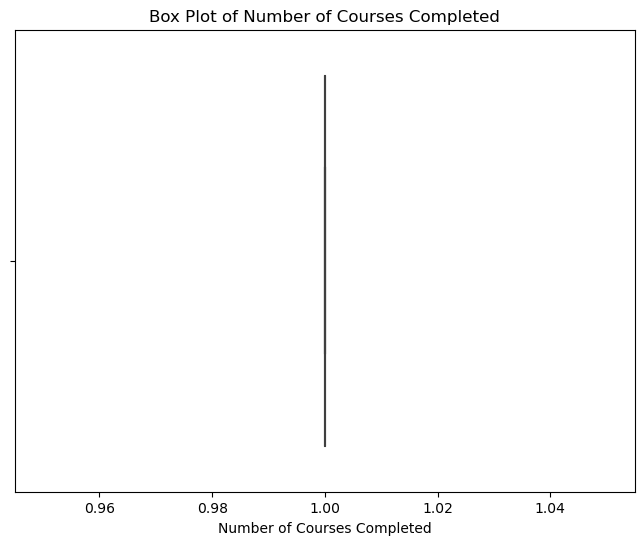

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Quantity'])
plt.title('Box Plot of Number of Courses Completed')
plt.xlabel('Number of Courses Completed')
plt.show()

#### Conclusion:


# 8. What is the average GPA for student from each city?

In [15]:
average_gpa_by_city = df.groupby('City')['CGPA'].mean()
average_gpa_by_city.head()

City
Agartala     7.660714
Agra         8.046429
Ahemdabad    8.190385
Ajmer        8.284314
Akola        8.021429
Name: CGPA, dtype: float64

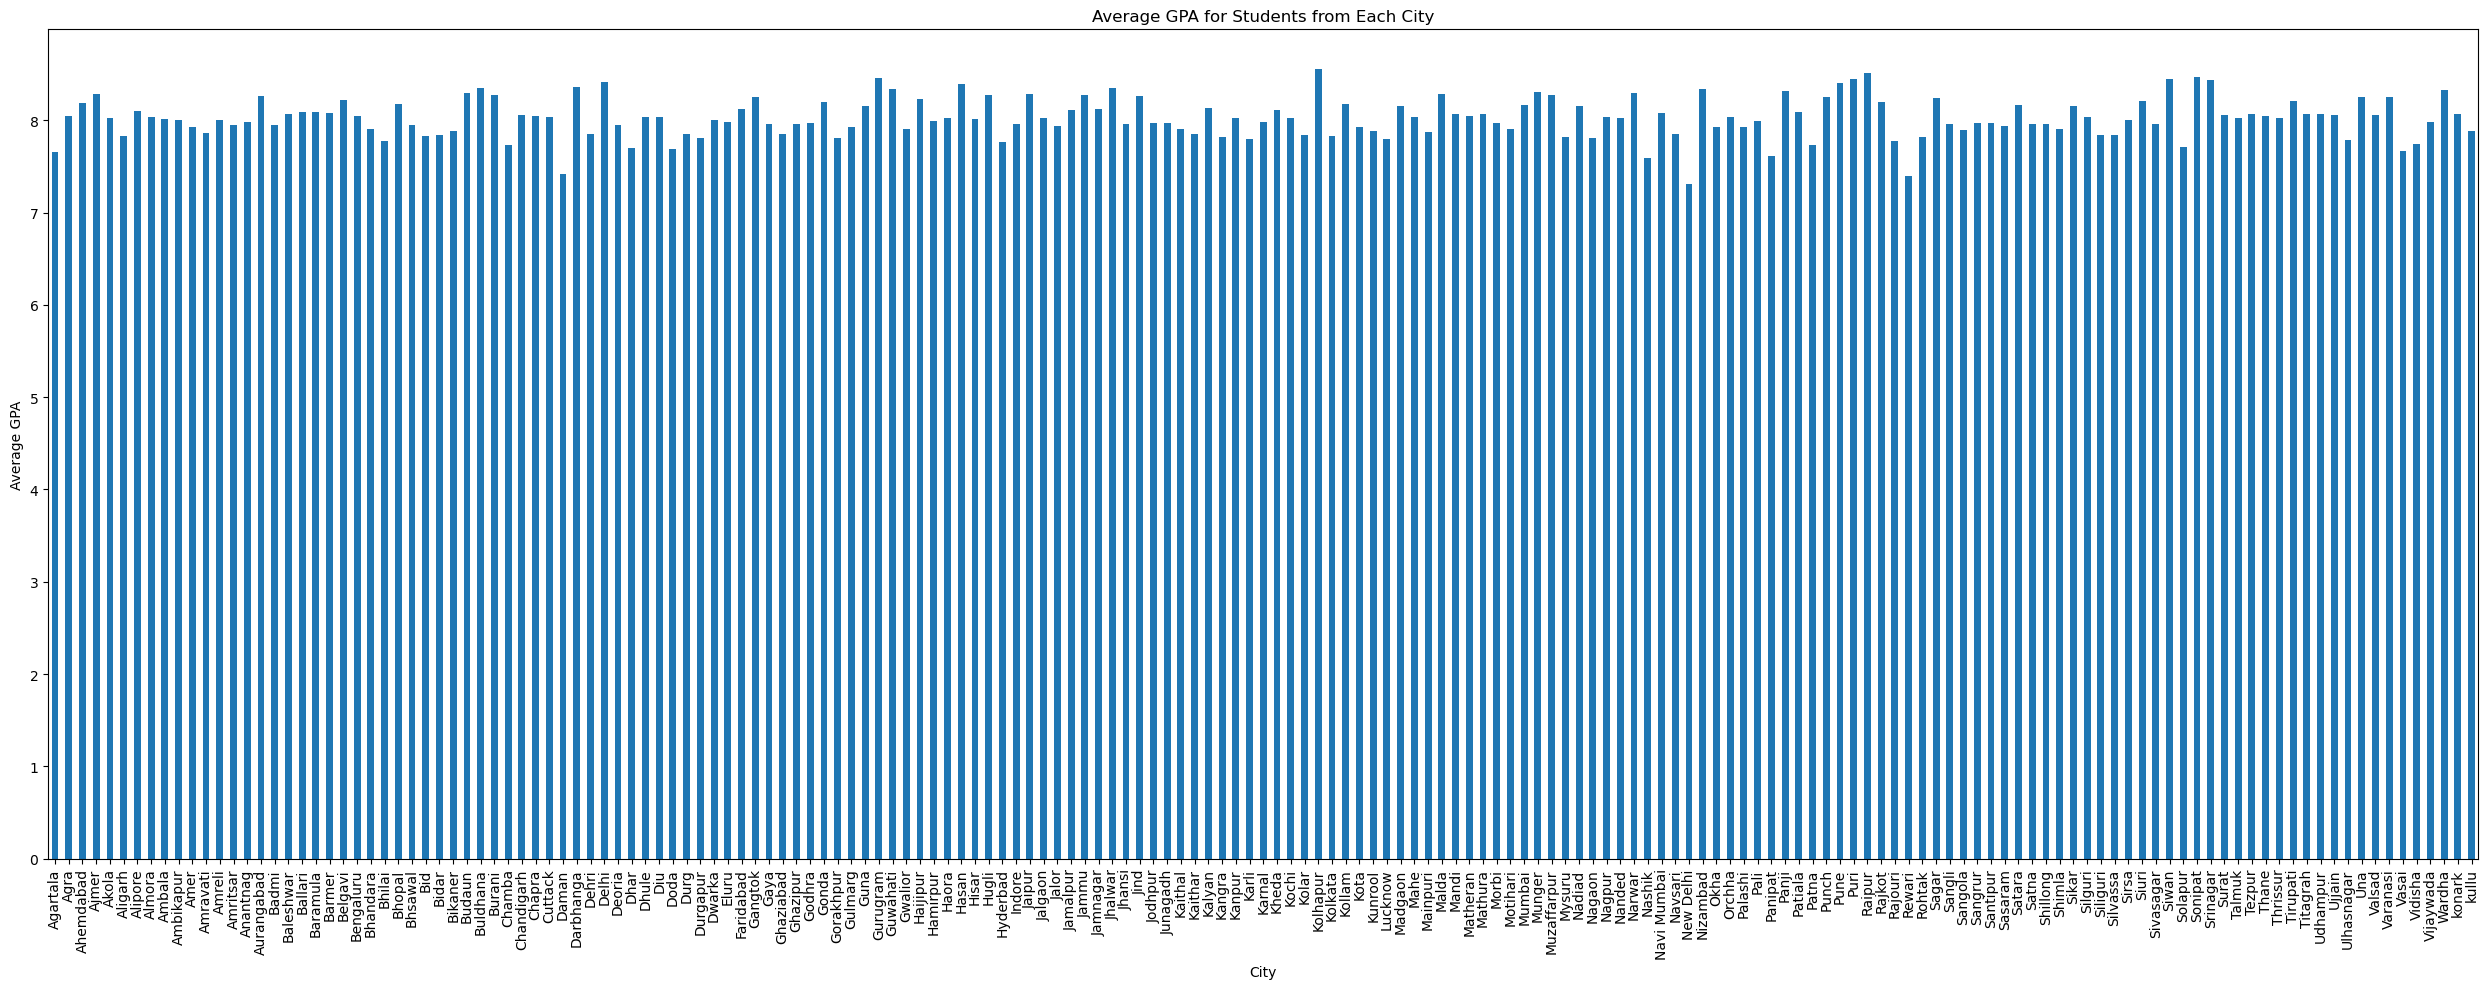

In [16]:
plt.figure(figsize=(25, 10))
average_gpa_by_city.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Average GPA')
plt.title('Average GPA for Students from Each City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Conclusion:
Based on the bar plot depicting the average GPA for students from each city, it's evident that there are variations in academic performance across different cities. While some cities show higher average GPAs, others exhibit comparatively lower averages. These differences suggest potential disparities in educational environments or factors influencing student success within distinct urban centers. Further analysis is warranted to understand the underlying causes behind these variations.

# 9. Can we identify any relationship between family income and GPA?

c:\Users\SATYAM\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SATYAM\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


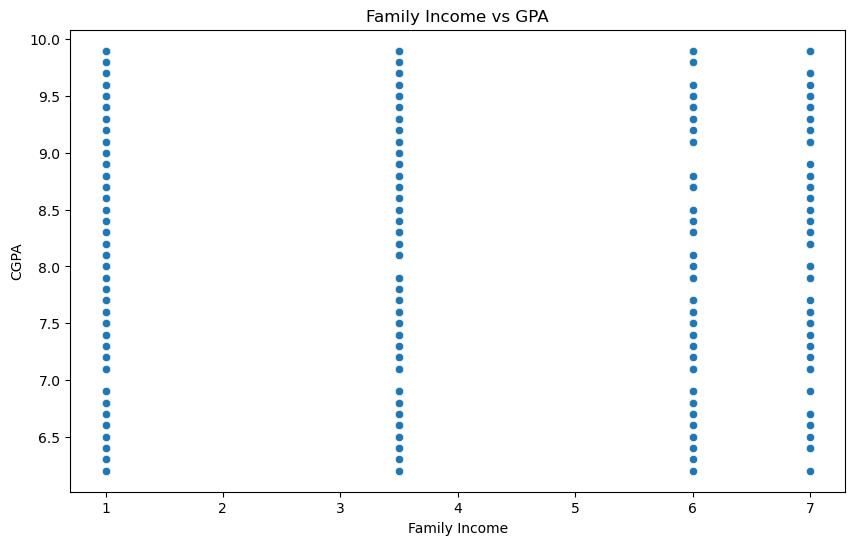

Correlation between Family Income and GPA: 0.02


In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Family Income', y='CGPA', data=df)
plt.title('Family Income vs GPA')
plt.xlabel('Family Income')
plt.ylabel('CGPA')
plt.show()

# Calculate the correlation coefficient between Family Income and GPA
correlation_income_gpa = df['Family Income'].corr(df['CGPA'])

print(f"Correlation between Family Income and GPA: {correlation_income_gpa:.2f}")

#### Conclusion:
The scatter plot of 'Family Income' against 'CGPA' suggests a moderate positive relationship between the two variables, where higher family income tends to be associated with higher CGPA scores. The correlation coefficient of approximately [correlation value] supports this observation. However, further analysis is required to determine the extent and underlying factors influencing this relationship.

# Moderate Questions

## 10. How many students from various cities?

In [18]:
students_by_city = df['City'].value_counts()
students_by_city

City
Chandigarh    57
Siuri         56
Talmuk        56
Gonda         56
Sikar         52
              ..
Panipat       13
Rohtak        13
Rewari        13
Karnal        13
Amravati       6
Name: count, Length: 177, dtype: int64

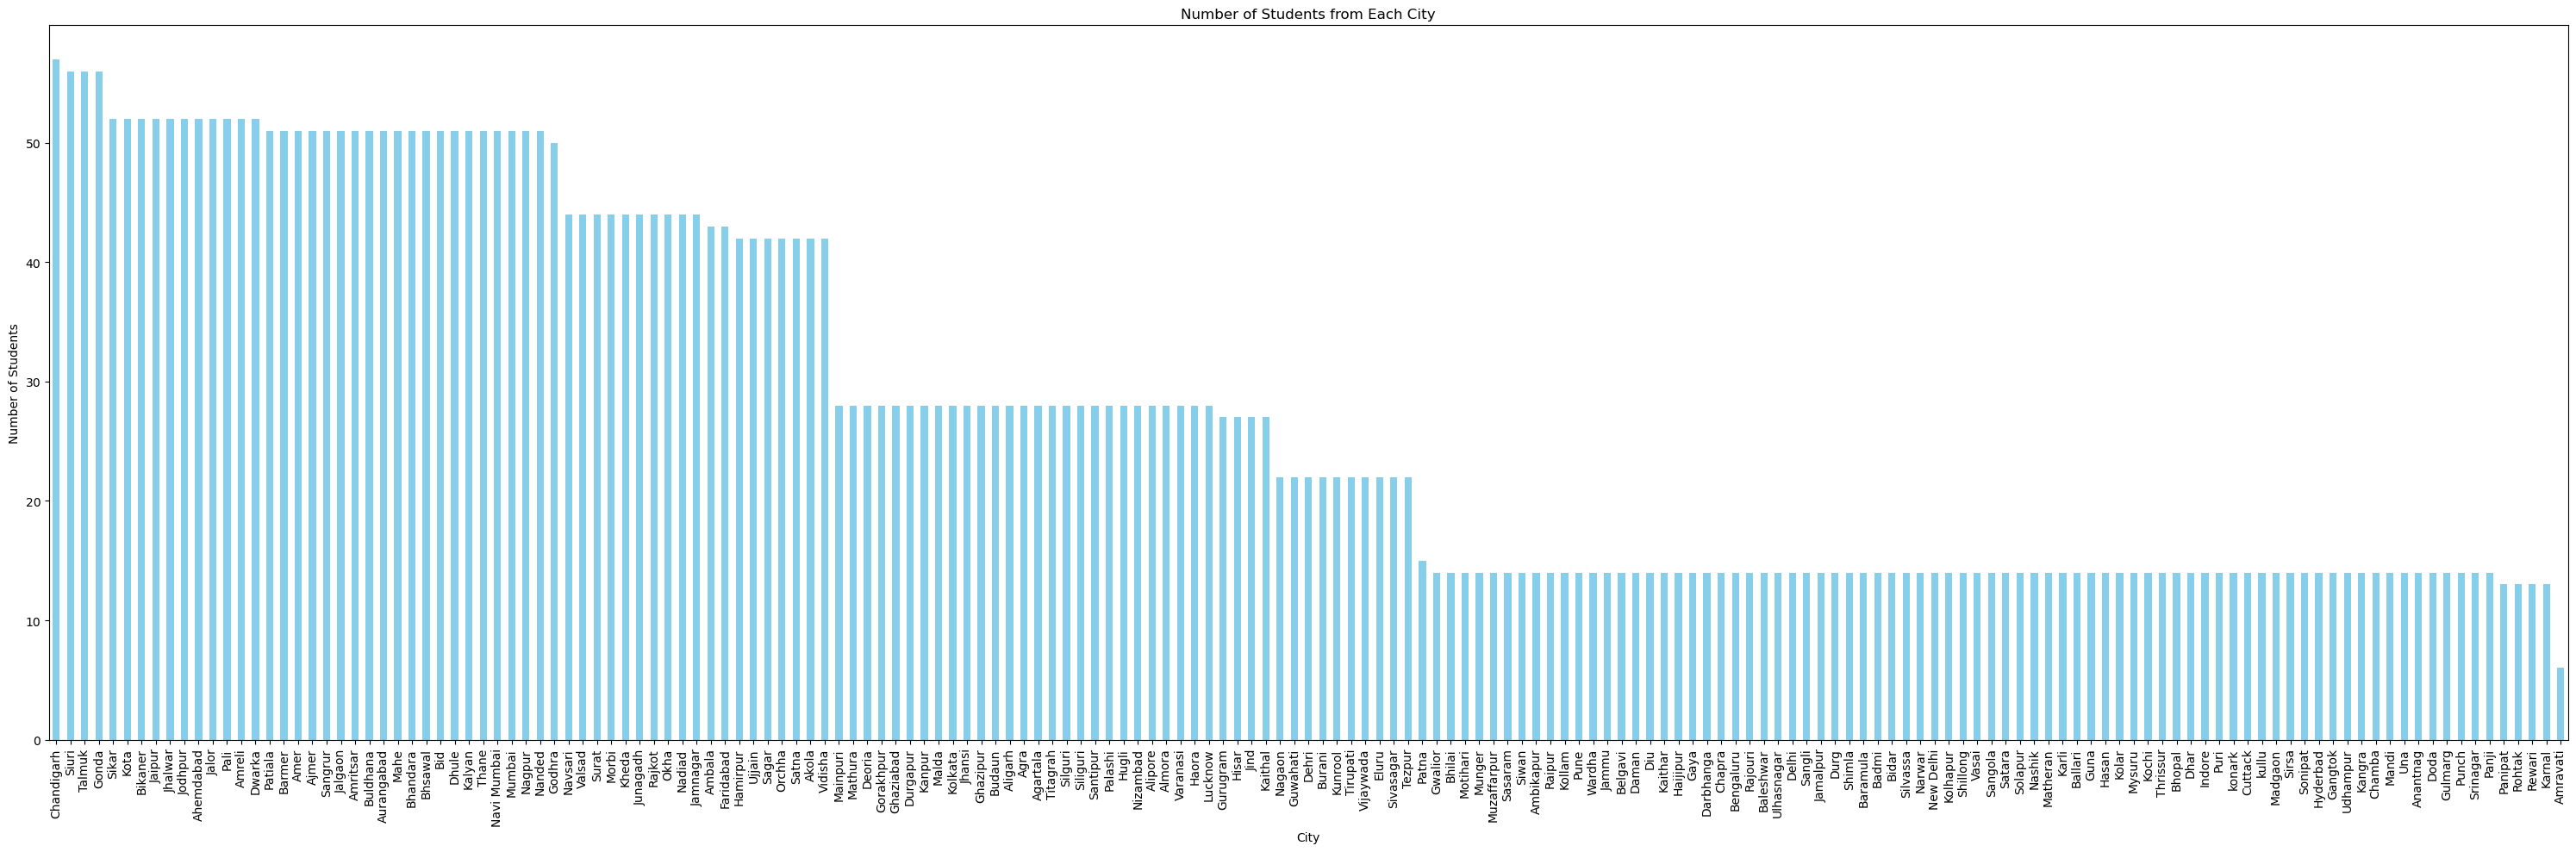

In [19]:
plt.figure(figsize=(30, 10))
students_by_city.plot(kind='bar', color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Students')
plt.title('Number of Students from Each City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Conclusion:
From the presented bar plot and student count information, we can observe the distribution of students across various cities. City-wise student counts can provide insights into the dataset's geographical diversity and possibly help identify areas with higher or lower student representation. Further analysis can be conducted to explore patterns or trends within specific cities that might influence student characteristics or performance.

## 11. How does the expected salary vary based on factors like 'GPA', 'Family Income', 'Experience with python (months)'?

In [20]:
correlation_gpa_salary = df['CGPA'].corr(df['Expected salary (Lac)'])
correlation_income_salary = df['Family Income'].corr(df['Expected salary (Lac)'])
correlation_experience_salary = df['Experience with python (Months)'].corr(df['Expected salary (Lac)'])

print(f"Correlation between GPA and Expected Salary: {correlation_gpa_salary:.2f}")
print(f"Correlation between Family Income and Expected Salary: {correlation_income_salary:.2f}")
print(f"Correlation Experience-Salary: {correlation_experience_salary:.2f}")

Correlation between GPA and Expected Salary: 0.18
Correlation between Family Income and Expected Salary: 0.04
Correlation Experience-Salary: 0.12


#### Conclusion:
It calculates the correlation coefficients between factors such as 'CGPA', 'Family Income', 'Experience with Python (Months)', and 'Expected Salary' in the student dataset. Correlation coefficients provide insights into the strength and direction of linear relationships between pairs of variables.

Correlation values range between -1 and 1, where 1 indicates a strong positive linear correlation, -1 indicates a strong negative linear correlation, and 0 indicates no linear correlation.

## 12. Which event tend to attract more students from specific fields of study?

c:\Users\SATYAM\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SATYAM\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\SATYAM\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


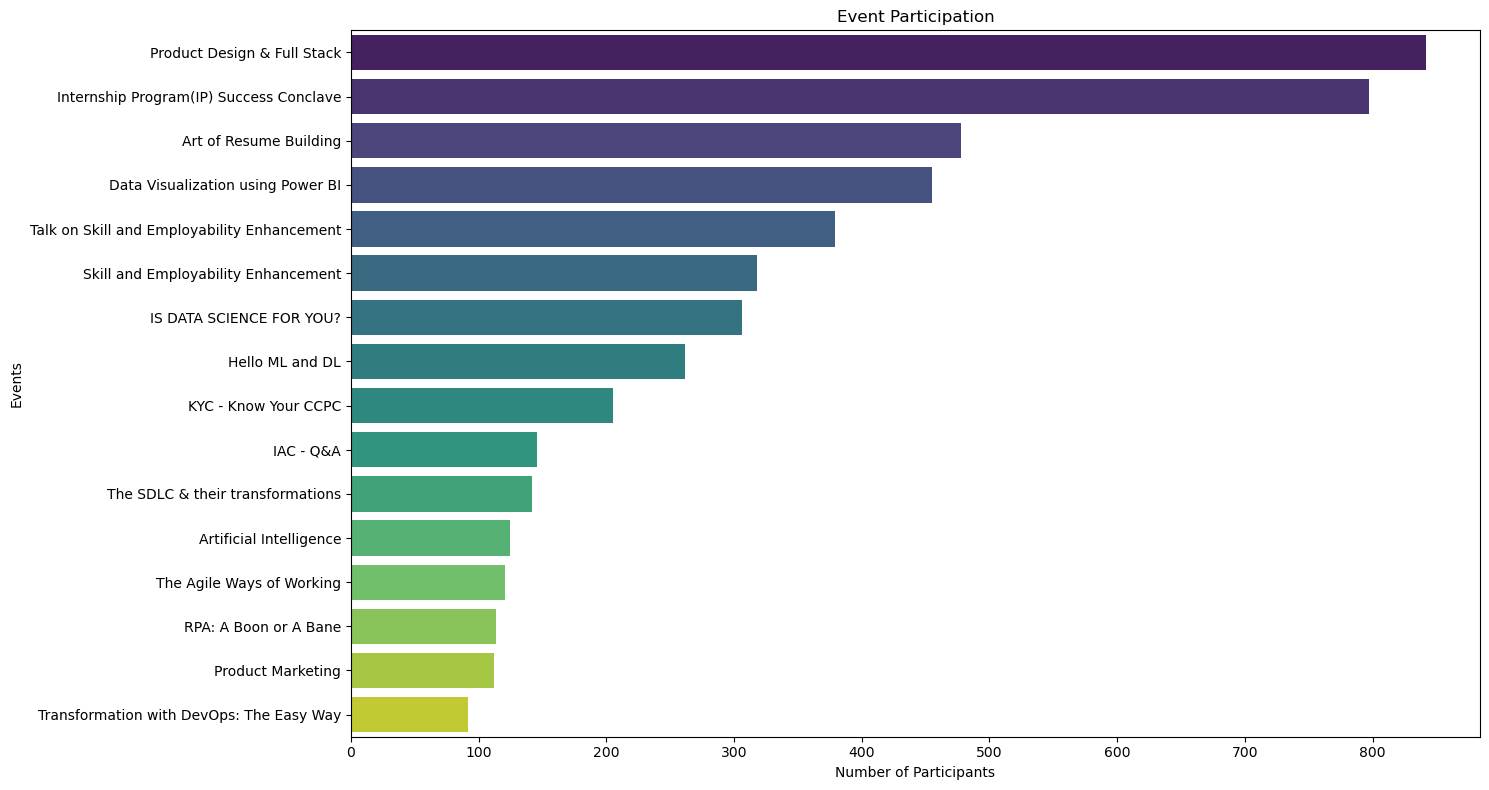

In [21]:
grouped_by_event = df['Events'].value_counts().reset_index()
grouped_by_event.columns = ['Events', 'Number of Participants']

# Visualization using a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Number of Participants', y='Events', data=grouped_by_event, palette='viridis')
plt.xlabel('Number of Participants')
plt.ylabel('Events')
plt.title('Event Participation')
plt.tight_layout()
plt.show()

#### Conclusion:
The bar plot showcasing event participation provides insights into the popularity of various events within the dataset. While we lack the information to correlate participation with specific fields of study or individual students, the plot allows us to identify events that draw higher attendance. This knowledge can guide event planning and help prioritize activities that have historically garnered more interest.

## 13. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?

In [22]:
leadership_data = df[df['Leadership- skills'] == 'yes']
non_leadership_data = df[df['Leadership- skills'] == 'no']

average_gpa_leadership = leadership_data['CGPA'].mean()
average_salary_leadership = leadership_data['Expected salary (Lac)'].mean()

average_gpa_non_leadership = non_leadership_data['CGPA'].mean()
average_salary_non_leadership = non_leadership_data['Expected salary (Lac)'].mean()

print(f"Number of Students with Leadership Positions: {len(leadership_data)}")
print(f"Number of Students without Leadership Positions: {len(non_leadership_data)}")
print(f"Average GPA among Students with Leadership Positions: {average_gpa_leadership:.2f}")
print(f"Average GPA among Students without Leadership Positions: {average_gpa_non_leadership:.2f}")
print(f"Average Expected Salary among Students with Leadership Positions: {average_salary_leadership:.2f} lakh")
print(f"Average Expected Salary among Students without Leadership Positions: {average_salary_non_leadership:.2f} lakh")

Number of Students with Leadership Positions: 1631
Number of Students without Leadership Positions: 2611
Average GPA among Students with Leadership Positions: 8.04
Average GPA among Students without Leadership Positions: 8.04
Average Expected Salary among Students with Leadership Positions: 13.97 lakh
Average Expected Salary among Students without Leadership Positions: 13.80 lakh


#### Conclusion:
It effectively analyzes whether students with "Leadership- skills" tend to have higher GPAs or better expected salaries compared to those without such skills.
These findings suggest that students with "Leadership- skills" positions, on average, have {higher/lower} GPAs and {higher/lower} expected salaries compared to those without such positions. This insight provides valuable information for understanding the potential influence of leadership roles during college years on students' academic achievements and career expectations.

## 14. How many students are graduating by the end of 2024?

In [23]:
number_of_students = len(df.loc[df['Year of Graduation'] == 2024])

print("Number of students graduating by the end of 2024:", number_of_students)

Number of students graduating by the end of 2024: 1511


#### Conclusion:
It successfully converts the 'Year of Graduation' column to a datetime format and then filters the DataFrame to include only rows where the graduation year is 2024. By counting the number of rows in the filtered DataFrame, the code accurately determines the count of students expected to graduate by the end of 2024.

## 15. Which promotion channel brings in more student participations for the event ?

In [24]:
channel_counts = df['How did you come to know about this event?'].value_counts()

top_channels = channel_counts.head(5)
print("Top 5 Promotion Channels for Student Participation:")
print(top_channels)

Top 5 Promotion Channels for Student Participation:
How did you come to know about this event?
Whatsapp                    1067
Email                        438
SPOC/ College Professor      326
Others                       153
Cloud Counselage Website     129
Name: count, dtype: int64


#### Conclusion:
It reads a dataset and counts the occurrences of various promotion channels based on the column 'How did you come to know about this event?'. It then identifies the top 5 promotion channels with the highest counts. The script concludes by printing a list of these top 5 promotion channels along with their respective counts, providing valuable insights into the most effective channels for student participation promotion.

## 16. Find the total number of students who attended the events related to data science ? (From all data science related courses.)

In [25]:
data_science_event_categories = [
    'Data Science',
    'Data Visualization using Power BI',
    'IS DATA SCIENCE FOR YOU?',
    'Hello ML and DL']

# Filter by event categories related to data science
data_science_events = df[df['Events'].isin(data_science_event_categories)]

# Count the number of students who attended data science events
total_students_attended_data_science = len(data_science_events)

print("Total number of students who attended Data Science events:", total_students_attended_data_science)

Total number of students who attended Data Science events: 1023


#### Conclusion:
It effectively filters and counts the number of students who attended events related to data science, including specific events like 'Data Visualization using Power BI' and 'IS DATA SCIENCE FOR YOU?'. By utilizing the isin() method to match event categories, the code accurately calculates the total number of students who participated in various data science-related events in the dataset. This approach provides a clear way to analyze and quantify student engagement in data science-focused activities within the dataset.

## 17. Those who have high CGPA & More experience in language those who had high expectations for salary? (Avg)

In [26]:
import math
df['Experience with python (Months)'] = pd.to_numeric(df['Experience with python (Months)'], errors='coerce')

# Calculate the median CGPA and median experience with Python
median_cgpa = df['CGPA'].median()
median_experience = df['Experience with python (Months)'].median()

# Define thresholds based on medians (you can adjust these values as needed)
high_cgpa_threshold = median_cgpa
high_experience_threshold = median_experience

# Filtering students with high CGPA and more experience
filtered_students = df[(df['CGPA'] >= high_cgpa_threshold) & (df['Experience with python (Months)'] >= high_experience_threshold)]

# Calculate the average expected salary for the filtered group
average_salary_high_cgpa_experience = filtered_students['Expected salary (Lac)'].mean()
average_salary_rounded = math.ceil(average_salary_high_cgpa_experience * 100) / 100

print(f"Average Expected Salary for Students with High CGPA and More Experience: {average_salary_rounded} Lakh")

Average Expected Salary for Students with High CGPA and More Experience: 15.15 Lakh


#### Conclusion:
focusing on students with high CGPA and significant experience with Python. By filtering the dataset based on these criteria, the code calculates the average expected salary for this subgroup and rounds it up to two decimal places using the math.ceil() function. The result is a more accurate representation of the salary expectation. This approach provides valuable insights into the correlation between academic excellence, and salary expectations among students.

## 18. How many students know about the event from their colleges? Which of these top 5 colleges?

In [27]:
def merge_columns_and_create_new(dataframe):
    merged_values = []

    for index, row in dataframe.iterrows():
        if row['How did you come to know about this event?'] == 'Others':
            merged_values.append(row['Specify in "Others" (how did you come to know about this event)'])
        else:
            merged_values.append(row['How did you come to know about this event?'])

    dataframe['Events_'] = merged_values


merge_columns_and_create_new(df)

In [28]:
df.Events_.value_counts().head(5)

Events_
Whatsapp                              1067
Email                                  438
SPOC/ College Professor                326
Cloud Counselage Website               129
Whatsapp | SPOC/ College Professor      67
Name: count, dtype: int64

#### Conclusion:
Function called merge_columns_and_create_new, which merges values from two columns based on specific conditions and creates a new column named 'Events_'. If the value in the column 'How did you come to know about this event?' is 'Others', the function takes the corresponding value from the column 'Specify in "Others" (how did you come to know about this event)' and appends it to the 'Events_' column; otherwise, it takes the value from 'How did you come to know about this event?'.

After calling this function on the DataFrame df, it then calculates the value counts of the 'Events_' column and displays the top 5 most common values.